In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('../Downloads/agaricus-lepiota.data')
data.shape

(8123, 23)

In [7]:
data.columns = ['target','cap-shape' ,'cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'
]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
target                      8123 non-null object
cap-shape                   8123 non-null object
cap-surface                 8123 non-null object
cap-color                   8123 non-null object
bruises                     8123 non-null object
odor                        8123 non-null object
gill-attachment             8123 non-null object
gill-spacing                8123 non-null object
gill-size                   8123 non-null object
gill-color                  8123 non-null object
stalk-shape                 8123 non-null object
stalk-root                  8123 non-null object
stalk-surface-above-ring    8123 non-null object
stalk-surface-below-ring    8123 non-null object
stalk-color-above-ring      8123 non-null object
stalk-color-below-ring      8123 non-null object
veil-type                   8123 non-null object
veil-color                  8123 non-null object
ring-number

In [9]:
data.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [10]:
# checking numbers of unique value in each columns
uni = []
for col in data.columns:
    uni.append(len(np.unique(data[col])))
pd.DataFrame({"columns":data.columns,
             "Unique":uni})

,columns,Unique
0,target,2
1,cap-shape,6
2,cap-surface,4
3,cap-color,10
4,bruises,2
5,odor,9
6,gill-attachment,2
7,gill-spacing,2
8,gill-size,2
9,gill-color,12


In [11]:
np.unique(data['target'])

array(['e', 'p'], dtype=object)

In [12]:
pd.crosstab(index=data['target'],columns='Count',normalize=True)

col_0,Count
target,
e,0.518035
p,0.481965


In [13]:
le = LabelEncoder()

In [14]:
for col in data.columns:
    data[col] = le.fit_transform(data[col])

In [15]:
data.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [16]:
data.describe()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,...,8123.000000,8123.000000,8123.000000,8123.0,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,0.481965,3.347901,1.827650,4.504740,0.415487,4.144528,0.974147,0.161517,0.309122,4.810784,...,1.603595,5.816201,5.794534,0.0,1.965530,1.069432,2.291764,3.596947,3.644097,1.508187
std,0.499705,1.604323,1.229947,2.545972,0.492836,2.103758,0.158705,0.368030,0.462160,3.540565,...,0.676001,1.901819,1.907362,0.0,0.242684,0.271080,1.801683,2.382744,1.252139,1.719645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [17]:
np.unique(data['veil-type'])

array([0])

In [18]:
data.drop(columns='veil-type',inplace=True)

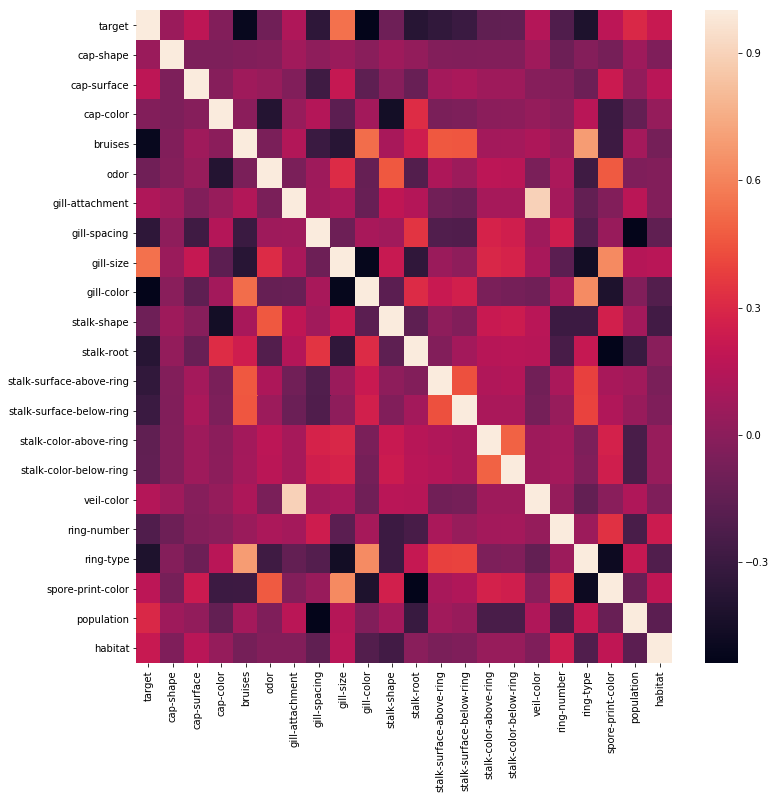

In [19]:
ccd_corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(ccd_corr,annot=False)

In [20]:
X = data.drop(columns='target')
print(X.shape)
y = data['target'].values
y = y.reshape(-1, 1)
print(y.shape)

(8123, 21)
(8123, 1)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46, stratify = y)

In [24]:
pd.DataFrame(X_train[:5])

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7859,0,2,8,0,5,1,1,0,7,0,...,1,1,7,7,2,2,4,7,2,1
3651,5,3,3,0,2,1,0,0,7,0,...,1,1,4,4,2,1,2,1,5,0
2002,5,0,4,1,5,1,0,0,10,1,...,2,2,3,3,2,1,4,2,5,0
1247,2,0,3,0,5,1,1,0,5,1,...,0,2,7,7,2,1,0,2,0,1
6415,2,3,4,0,8,1,0,1,0,1,...,2,1,6,6,2,1,0,7,4,0


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import precision_score,recall_score

### Logistic Regression

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr.score(X_test,y_test)*100

94.8899664304364

In [27]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[1331   58]
 [  79 1213]]
94.8899664304364


In [28]:
# custom plot function
def listPlot(lis,n):
    plt.figure()
    plt.plot([x * 100 for x in lis])
    plt.xlabel('N value')
    plt.ylabel('(%)')
    plt.title("X = {} Y = {}".format([x for x in range(n)][np.argmax(lis)], (max(lis)*100)))
    plt.axhline(y=(max(lis)*100),color = 'r', linestyle = '--')
    plt.axvline(x=[x for x in range(n)][np.argmax(lis)],color = 'g', linestyle = '--')
    plt.show()

### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
def maxDepthDT(depth):
    dt = DecisionTreeClassifier(max_depth=depth,random_state=0)
    dt.fit(X_train,y_train)
    dt_predict = dt.predict(X_test)
    return (dt.score(X_train,y_train)),dt.score(X_test,y_test)
    

In [31]:
train_acc = []
validate_acc = []
for i in range(1,21):
    train_a,val_a = maxDepthDT(i)
    train_acc.append(train_a)
    validate_acc.append(val_a)

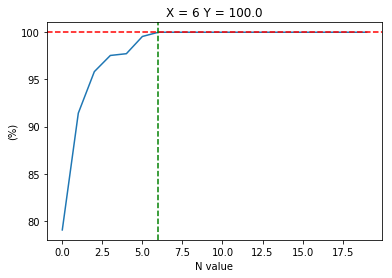

In [32]:
listPlot(validate_acc,100)

In [33]:
trade = pd.DataFrame({
    'max depth':range(1,21),
    'training acc':train_acc,
    'validation acc':validate_acc
})
trade

,max depth,training acc,validation acc
0,1,0.790334,0.790377
1,2,0.909408,0.914211
2,3,0.958839,0.958225
3,4,0.979052,0.975382
4,5,0.980338,0.977247
5,6,0.994855,0.995524
6,7,1.000000,1.000000
7,8,1.000000,1.000000
8,9,1.000000,1.000000
9,10,1.000000,1.000000


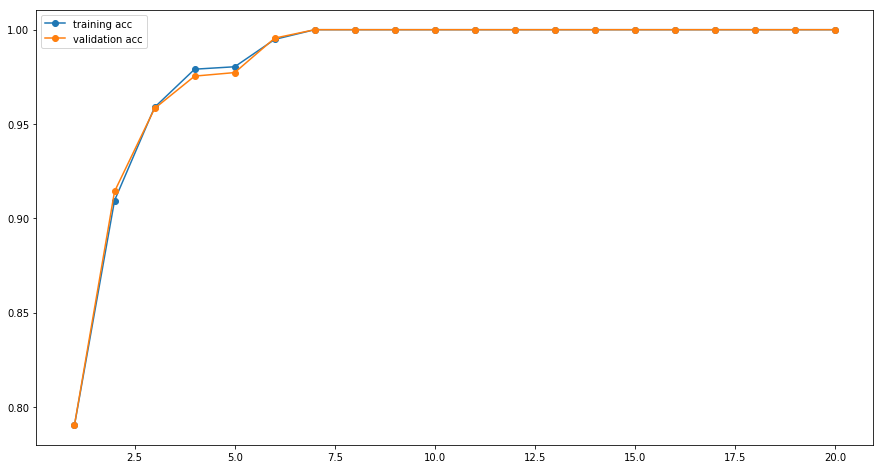

In [34]:
plt.figure(figsize=(15,8))
plt.plot(trade['max depth'],trade['training acc'],marker='o')
plt.plot(trade['max depth'],trade['validation acc'],marker='o')
plt.legend()

In [35]:
dt = DecisionTreeClassifier(random_state=0,max_depth=6)
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
dt.score(X_train,y_train)*100

99.48548327820654

In [36]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[1389    0]
 [  12 1280]]
99.55240581872435


### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier()

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
pred = rfc.predict(X_test)

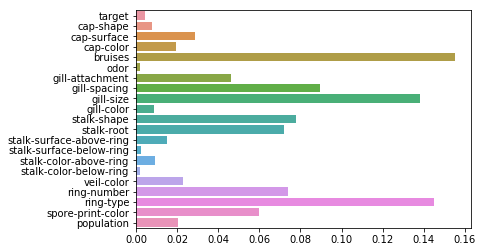

In [41]:
feature  =rfc.feature_importances_
col  = data.columns[:-1]
sns.barplot(y=col,x=feature,orient='h')

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,pred)

1.0

In [44]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1389\n           1       1.00      1.00      1.00      1292\n\n   micro avg       1.00      1.00      1.00      2681\n   macro avg       1.00      1.00      1.00      2681\nweighted avg       1.00      1.00      1.00      2681\n'

In [45]:
f1_score(y_test,pred)

1.0